<a href="https://colab.research.google.com/github/kishanAd/pythonbasics/blob/master/Coronapredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/data"

mark.csv  owid-covid-data.csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


------------------------------
Trainingdata
------------------------------
------------------------------
Trainingdata
------------------------------
Accuracy:99.834 %
25
------------------------------
Predicton
------------------------------
Prediction after 25 days is 5055554


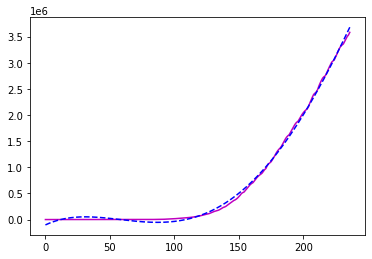

In [ ]:
covid_data=pd.read_csv("/content/drive/My Drive/data/owid-covid-data.csv")
covid_data=covid_data[["date","total_cases","location"]]
# print("-"*30);print("HEAD");print("-"*30)
# covid_data.info()
Brazil=covid_data[covid_data["location"]=="Brazil"]


Brazil["id"]=np.arange(1,238)
# Nepal.head()
x=np.array(Brazil["id"]).reshape(-1,1)

# print(x)

print("-"*30);print("Trainingdata");print("-"*30)



Brazil.head()
x=np.array(Brazil["id"]).reshape(-1,1)
y=np.array(Brazil["total_cases"]).reshape(-1,1)


# #plot
plt.plot(y,"-m")



polyfeat=PolynomialFeatures(degree=4)
x=polyfeat.fit_transform(x)
# print(x)

#training data
print("-"*30);print("Trainingdata");print("-"*30)

model=LinearRegression().fit(x,y)
accuracy=model.score(x,y)
print(f'Accuracy:{round(accuracy*100,3)} %' )



y0=model.predict(x)
plt.plot(y0,"--b")

#prediction after days
days=int(input())
print("-"*30);print("Predicton");print("-"*30)
print(f"Prediction after {days} days is ",end="")
print(int(model.predict(polyfeat.transform([[237+days]]))))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 24750 to 24986
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         224 non-null    object 
 1   total_cases  224 non-null    float64
 2   location     224 non-null    object 
dtypes: float64(1), object(2)
memory usage: 7.0+ KB
Accuracy : 98.705%
47
prediction after 47 days is 99879


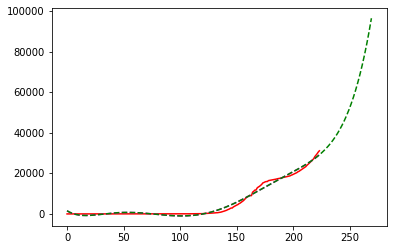

In [ ]:
Nepal=covid_data[covid_data["location"]=="Nepal"]
Nepal=Nepal[Nepal["total_cases"].notna()]

Nepal.info()
Nepal["id"]=np.arange(1,225)
x1=np.array(Nepal["id"]).reshape(-1,1)
y1=np.array(Nepal["total_cases"]).reshape(-1,1)


plt.plot(y1,"r-")


polyfeature=PolynomialFeatures(degree=6)
x1=polyfeature.fit_transform(x1)

model1=LinearRegression().fit(x1,y1)
accuracy1=model1.score(x1,y1)
print(f'Accuracy : {round(accuracy1*100,3)}%' )
y0=model1.predict(x1)
plt.plot(y0,"--m")


#prediction
days=int(input())
print(f'prediction after {days} days is ',end="")
print(int(model1.predict(polyfeature.transform([[224+days]]))))


#plotting data after days
x2=np.array(list(range(1,224+days))).reshape(-1,1)
y2=model1.predict(polyfeature.fit_transform(x2))
plt.plot(y2,"--g")




# plt.plot(Nepal["date"],Nepal["total_cases"])